<H2>Introduction</H2>
<p>This program is to solve two questions:</p>
<p>1. compare manhattan neighborhood with Toronto neighborhood using already extracted sheets from previous written manhattan and toronto nighborhood analysis. This program is to going to mark neighborhood same if 2 out of top 3 most common venue is matching. This progam is simply going to loop through neighborhoods to find out matching common venues.Final output shows Manhattan neighborhood, its matching Toronto Neighborhood and minimum 2 out of top 3 common venues.</p>
<p>2. Find out where in Toronto can we open Thai Restaurant. </p>

<H2>Data</H2>
<p>We will be using following already extracted sheets for Manhattan and Toronto showing top 10 common venues for each neighborhood</p>
<p><a href=https://github.com/manuvrush/Coursera_Capstone/blob/main/manhattan.csv> Manhattan Data </a></p>
<p><a href=https://github.com/manuvrush/Coursera_Capstone/blob/main/toronto.csv> Toronto Data </a></p>


In [11]:
import pandas as pd
import numpy as np
manhattan_data = pd.read_csv('manhattan.csv')
toronto_data = pd.read_csv('toronto.csv')
print('Manhattan Neighborhood:')
print(manhattan_data.head())
print('******************************************************************************************')
print('Toronto Neighborhood:')
print(toronto_data.head())


Manhattan Neighborhood:
   Unnamed: 0    Borough        Neighborhood  Latitude  Longitude  \
0           0  Manhattan         Marble Hill        41        -74   
1           1  Manhattan           Chinatown        41        -74   
2           2  Manhattan  Washington Heights        41        -74   
3           3  Manhattan              Inwood        41        -74   
4           4  Manhattan    Hamilton Heights        41        -74   

   Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
0               0        Discount Store        Sandwich Place   
1               2    Chinese Restaurant                Bakery   
2               0                  Café                Bakery   
3               4    Mexican Restaurant                  Café   
4               4           Pizza Place           Coffee Shop   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0           Coffee Shop                   Gym           Yoga Studio   
1          Cocktail Bar   Am

<H2> Methedology </H2>
<p> 1. To solve first problem of comparing neighborhoods, we will compare each neighborhoods from Manhattan with each neighborhood from Toronto <p>
<p> 2. We will be comparing top 3 common venue category and find out if at least 2 out of top 3 common venue category matches then we can consider neighborhoods are similar<p>
<p> 3. This can be done by executing for loop and matching values and keeping counter, if counter value is greatrer than or equal to 2 then we can add it to list and later converted to pandas dataframe.<p>
<p> 4. Final output is later printed which shows Manhattan neighborhood, Toronto Neighborhood and matching common venue categories.<p>
        
    

In [1]:
matching_neighborhoods = []
for idm in manhattan_data.index:
    count = 0
    common = ""
    for idt in toronto_data.index:
        if manhattan_data["1st Most Common Venue"][idm] == toronto_data["1st Most Common Venue"][idt]:
            count = count+1
            common = common + '; ' + toronto_data["1st Most Common Venue"][idt]
        if manhattan_data["1st Most Common Venue"][idm] == toronto_data["2nd Most Common Venue"][idt]:
            count = count+1     
            common = common + '; ' + toronto_data["2nd Most Common Venue"][idt]
        if manhattan_data["1st Most Common Venue"][idm] == toronto_data["3rd Most Common Venue"][idt]:
            count = count+1        
            common = common + '; ' + toronto_data["3rd Most Common Venue"][idt]
        if manhattan_data["2nd Most Common Venue"][idm] == toronto_data["1st Most Common Venue"][idt]:
            count = count+1
            common = common + '; ' + toronto_data["1st Most Common Venue"][idt]
        if manhattan_data["2nd Most Common Venue"][idm] == toronto_data["2nd Most Common Venue"][idt]:
            count = count+1     
            common = common + '; ' + toronto_data["2nd Most Common Venue"][idt]
        if manhattan_data["2nd Most Common Venue"][idm] == toronto_data["3rd Most Common Venue"][idt]:
            count = count+1    
            common = common + '; ' + toronto_data["3rd Most Common Venue"][idt]
        if manhattan_data["3rd Most Common Venue"][idm] == toronto_data["1st Most Common Venue"][idt]:
            count = count+1
            common = common + '; ' + toronto_data["1st Most Common Venue"][idt]
        if manhattan_data["3rd Most Common Venue"][idm] == toronto_data["2nd Most Common Venue"][idt]:
            count = count+1     
            common = common + '; ' + toronto_data["2nd Most Common Venue"][idt]
        if manhattan_data["3rd Most Common Venue"][idm] == toronto_data["3rd Most Common Venue"][idt]:
            count = count+1   
            common = common + '; ' + toronto_data["3rd Most Common Venue"][idt]
        if count >=2:
            #print('Manhattan Neighborhood ', manhattan_data["Neighborhood"][idm], " is similar to toronto neighborhood", toronto_data["Neighborhood"][idt], " because of common venues ", common ) 
            #print(manhattan_data.iloc[idm], "......", toronto_data.iloc[idt])
            matching_neighborhoods.append([manhattan_data["Neighborhood"][idm], toronto_data["Neighborhood"][idt], common])
            count = 0
            break
        count = 0
        common = ""
df = pd.DataFrame(matching_neighborhoods, columns=["Manhattan Neighborhood", "Toronto Neighborhood", "Common Venue Categories"])
df['Common Venue Categories'] = df['Common Venue Categories'].str.strip("; ")
print(df)        

   Manhattan Neighborhood                         Toronto Neighborhood  \
0             Marble Hill            Bedford Park, Lawrence Manor East   
1      Washington Heights                                     Christie   
2        Hamilton Heights                     Garden District, Ryerson   
3          Manhattanville                               Stn A PO Boxes   
4             East Harlem                High Park, The Junction South   
5         Upper East Side                           Central Bay Street   
6               Yorkville                                    Don Mills   
7              Lenox Hill                           Central Bay Street   
8         Upper West Side                           Central Bay Street   
9                 Midtown     Toronto Dominion Centre, Design Exchange   
10            Murray Hill     Toronto Dominion Centre, Design Exchange   
11                Chelsea                              Studio District   
12           East Village             

<H6> Analysis </H6>
<p>Below section is going to find out if new shop to be opened is not in top 10 venue categories so that chances of getting more customers are higher.</p>
<p>Below program will compare shop_to_be_opened_category "Thai Restaurant" as an example with top 10 venues. if it does not exists then that neighborhood could be an option to open the restaurant.</p>
<p>Below function is to get venue details for a neighborhood</p>

In [3]:
import requests
CLIENT_ID = 'ANSWNDGC3DO14I5ZUNFW00HRF2U5ORTYZZXHAJPTAZRNAQJ5' # your Foursquare ID
CLIENT_SECRET = 'WHXVMVQFNZJ1SU5M3SGN0ZIK3H5T10D0PKBFMIYJEKZCOBRM' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value
ACCESS_TOKEN='DVKPFC5KWW20ONWCSU5DCQNVC1SVF52OHGMOJ32LYQ32DOZD'

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Your credentails:
CLIENT_ID: ANSWNDGC3DO14I5ZUNFW00HRF2U5ORTYZZXHAJPTAZRNAQJ5
CLIENT_SECRET:WHXVMVQFNZJ1SU5M3SGN0ZIK3H5T10D0PKBFMIYJEKZCOBRM


<p>Cell below find out neighborhoods where Thai Restaurant is not in top 10 of venue category and then generates 5 clusters for plotting the map.<p>

In [4]:
#!conda install -c conda-forge folium
import folium
shop_to_be_opened_category = "Thai Restaurant"
neighborhoods_to_explore = []
for idt in toronto_data.index:
    if shop_to_be_opened_category != toronto_data["1st Most Common Venue"][idt] and shop_to_be_opened_category != toronto_data["2nd Most Common Venue"][idt] \
    and shop_to_be_opened_category != toronto_data["3rd Most Common Venue"][idt]  and shop_to_be_opened_category != toronto_data["4th Most Common Venue"][idt]  and shop_to_be_opened_category != toronto_data["5th Most Common Venue"][idt] \
    and shop_to_be_opened_category != toronto_data["6th Most Common Venue"][idt]  and shop_to_be_opened_category != toronto_data["7th Most Common Venue"][idt]  and shop_to_be_opened_category != toronto_data["8th Most Common Venue"][idt] \
    and shop_to_be_opened_category != toronto_data["9th Most Common Venue"][idt] and shop_to_be_opened_category != toronto_data["10th Most Common Venue"][idt]:
            neighborhoods_to_explore.append(toronto_data["Neighborhood"][idt])
df_newshop_neighborhood_options = pd.DataFrame(neighborhoods_to_explore, columns=["Neighborhood"])
print(df_newshop_neighborhood_options["Neighborhood"].head(1))

print(toronto_data["Neighborhood"].head())
neighborhood_values = df_newshop_neighborhood_options.Neighborhood.values
one_neighborhood = toronto_data[toronto_data.Neighborhood.isin(neighborhood_values)]
print(one_neighborhood.head())

toronto_venues = getNearbyVenues(one_neighborhood['Neighborhood'],one_neighborhood['Latitude'],one_neighborhood['Longitude'],500)
print(toronto_venues.head())

toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

#print(toronto_onehot.head())
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
print(toronto_grouped.head())
# import k-means from clustering stage
from sklearn.cluster import KMeans

# set number of clusters
kclusters = 5

toronto_grouped_clustering = toronto_venues.drop(['Neighborhood','Venue','Venue Category'], 1)
toronto_grouped_clustering.head()
# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

# add clustering labels
toronto_venues.insert(0, 'Cluster Labels', kmeans.labels_)


0    Parkwoods
Name: Neighborhood, dtype: object
0                                      Parkwoods
1                               Victoria Village
2                      Regent Park, Harbourfront
3               Lawrence Manor, Lawrence Heights
4    Queen's Park, Ontario Provincial Government
Name: Neighborhood, dtype: object
   Unnamed: 0 Postal Code           Borough  \
0           0         M3A        North York   
1           1         M4A        North York   
2           2         M5A  Downtown Toronto   
3           3         M6A        North York   
4           4         M7A  Downtown Toronto   

                                  Neighborhood   Latitude  Longitude  \
0                                    Parkwoods  43.753259 -79.329656   
1                             Victoria Village  43.725882 -79.315572   
2                    Regent Park, Harbourfront  43.654260 -79.360636   
3             Lawrence Manor, Lawrence Heights  43.718518 -79.464763   
4  Queen's Park, Ontario Prov

<p>From above resultset, we just keep Venues having just Thai restaurants to find out locations where its not present.</p>
<p>Next step is to plot the graph to visualize and find out places of interest</p>

In [12]:

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
# create map
map_clusters = folium.Map(location=[43.75, -79.32], zoom_start=11)
pd.options.display.float_format = '{:,.0f}'.format

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

toronto_venues=toronto_venues.dropna()
toronto_venues.drop(toronto_venues[ toronto_venues['Venue Category'] != 'Thai Restaurant' ].index,inplace = True )
#print(toronto_venues['Venue Category'].values)
# add markers to the map
markers_colors = []
for lat, lon, poi, venue, category, cluster in zip(toronto_venues['Venue Latitude'], toronto_venues['Venue Longitude'], toronto_venues['Neighborhood'], toronto_venues['Venue'], toronto_venues['Venue Category'], toronto_venues['Cluster Labels']):
    #print(cluster)
    cluster = int(cluster)
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster) + ' Venue: ' + venue + ' Category: ' + category, parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
              
map_clusters

<H2>Results and Discussion:</H2>
<p>As you can see above, map shows Thai restaurants in Toronto highlighted using circlemarker.</p>
<p>Places where no cirle present could be our area of interest and we could get more customer and less business competition<p>
<p> You can see section 1, 2, 3, 4 and 5 as highlighted in the map below. Section 4 and 5 could be more competative as there are more options for customers.</p>



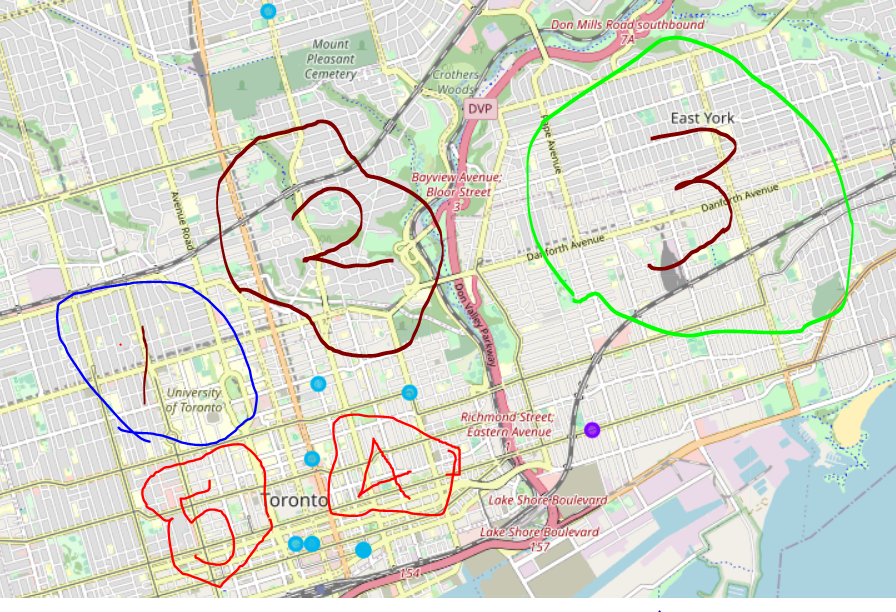

<H2>Conclusion:</H2>
<p>Above graph shows list of Thai restaurants in Toronto. As you can see, thre is no Thai restaurant in East York so that would be good place. Also, west of University of Toronto near university premises would be good idea considering by considering students as customers.</p>
<p>Using extracted data having top 10 most common venues, decision making was much easier and it becomes a simple program of venue catgory comparison to find out matching neighborhoods or simple map drawing with Thai restaurants as circles makes us easy to find out where to open the restaurant.</p>

    